## Notebook Objectives

Summarize the Necessary Knowleadge to Apply Exploratory Data Analysis


### Agenda

[Business Questions](#Business-Questions)<br>

[Imports](#Imports)<br>
&emsp;[Functions](#Functions)<br>
&emsp;[Settings](#Settings)<br>

[Loading Data](#Loading-Data)<br>

[Feature Engineering](#Feature-Engineering)<br>

[Exploratory Data Analysis](#Exploratory-Data-Analysis)<br>
&emsp;[Summary Statistics](#Summary-Statistics)<br>
&emsp;[Summary Promising and Potential Features](#Summary-Promising-and-Potential-Features)<br>

&emsp;[Missing Values](#Missing-Values)<br>

[Univariate Analysis](#Univariate-Analysis)<br>
&emsp;[Histograms](#Histograms)<br>
&emsp;[Box Plots](#Box-Plots)<br>
&emsp;[Bar Plots](#Bar-Plots)<br>

[Bivariate Analysis](#Bivariate-Analysis)<br>
&emsp;[Scatter Plots](#Scatter-Plots)<br>
&emsp;[Pair Plots](#Pair-Plots)<br>
&emsp;[Box Plots by Category](#Box-Plots-by-Category)<br>

[Multivariate Analysis](#Multivariate-Analysis)<br>
&emsp;[Correlation Heatmap](#Correlation-Heatmap)<br>
&emsp;[3D Scatter Plot](#3D-Scatter-Plot)<br>

[Data Distribution and Density](#Data-Distribution-and-Density)<br>
&emsp;[Denity Plots (KDE)](#Denity-Plots-(KDE))<br>
&emsp;[Hexbin Plots](#Hexbin-Plots)<br>

&emsp;[Summary and Insights](#Summary-and-Insights)<br>

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import psutil

### Functions

In [2]:
def check_memory_usage():
    # Get memory usage in bytes
    memory = psutil.virtual_memory()

    # Total physical memory available
    total_memory = memory.total

    # Available physical memory
    available_memory = memory.available

    # Used physical memory
    used_memory = memory.used

    # Percentage of used memory
    memory_percent = memory.percent

    print(f"Total Memory: {total_memory} bytes")
    print(f"Available Memory: {available_memory} bytes")
    print(f"Used Memory: {used_memory} bytes")
    print(f"Memory Usage Percentage: {memory_percent}%")
check_memory_usage()


# def read_table(query, database):
#     '''
#     Lê tabela do Athena por meio de consulta SQL e retorna a tabela resultante.
    
#     query: Código SQL
#     database: Nome do Banco de dados
    
#     returns pandas.DataFrame com dados da consulta 
#     '''
#     return wr.athena.read_sql_query(sql=query, database=database)


def describe_data(data):
    """ Inform Data Dimension. Data Types. Count and % of NaN.

    :param data: pandas.DataFrame
    :return: pandas.DataFrame with columns=['data_types', 'nan_count', 'nan_percentage']
    """

    print(f"Shape: {data.shape}")
    try:
        print(f"Duplicates: {data.duplicated().any()}")
    except Exception as e:
        print(f"Error when searching for duplicates:\n\t{e}")

    is_na = data.isna().sum()
    is_na_percentage = is_na / data.shape[0] * 100
    nan_data_frame = pd.concat([data.dtypes, is_na, is_na_percentage], axis=1)
    nan_data_frame.columns = ['data_types', 'nan_count', 'nan_percentage']
    return nan_data_frame

Total Memory: 16849256448 bytes
Available Memory: 4321677312 bytes
Used Memory: 12527579136 bytes
Memory Usage Percentage: 74.4%


### Settings

In [3]:
pd.set_option("display.max_columns", None)

### Loading Data

In [4]:
df_customer_abt = sns.load_dataset('iris')
df_customer_abt = df_customer_abt.rename(columns={
    "sepal_length": "customer_age",
    "sepal_width": "annual_income",
    "petal_length": "monthly_spending",
    "petal_width": "credit_score",
    "species": "customer_segment"
})

# Adjust the values to fit a business context
df_customer_abt["customer_age"] = (df_customer_abt["customer_age"] * 5).astype(int)  # Scale to age range
df_customer_abt["annual_income"] = (df_customer_abt["annual_income"] * 10000).round(2)  # Scale to income
df_customer_abt["monthly_spending"] = (df_customer_abt["monthly_spending"] * 500).round(2)  # Scale to spending
df_customer_abt["credit_score"] = (df_customer_abt["credit_score"] * 40).round(2)  # Scale loyalty score

np.random.seed(42)  # Set seed for reproducibility
df_customer_abt["customer_tenure"] = np.random.normal(loc=5, scale=2, size=len(df_customer_abt)).clip(0).round(1)
df_customer_abt["purchase_frequency"] = np.random.exponential(scale=10, size=len(df_customer_abt)).round(1)
df_customer_abt["preferred_channel"] = np.random.choice(['Online', 'In-Store', 'Hybrid'], size=len(df_customer_abt))

df_customer_abt.head()

,customer_age,annual_income,monthly_spending,credit_score,customer_segment,customer_tenure,purchase_frequency,preferred_channel
0,25,35000.0,700.0,8.0,setosa,6.0,21.8,Hybrid
1,24,30000.0,700.0,8.0,setosa,4.7,15.1,In-Store
2,23,32000.0,650.0,8.0,setosa,6.3,10.3,In-Store
3,23,31000.0,750.0,8.0,setosa,8.0,0.9,Hybrid
4,25,36000.0,700.0,8.0,setosa,4.5,1.8,In-Store


## Feature Engineering

In [5]:
features = df_customer_abt.select_dtypes('number').columns
categories = df_customer_abt.select_dtypes(object).columns

## Exploratory Data Analysis

### Summary Statistics

We need it to **understand Data Distribution and Dispersion**.    

        Mean, median, and mode reveal central tendencies.
        standard deviation and variance show data spread.
        Skewness and kurtosis help identify asymmetry and tail behavior.

**Detect Outliers**: extreme values can heavily impact clustering results.    

**Feature Scaling and Normalization**: statistics like range and standard deviation guide whether scaling is necessary.

        Features on different scales can dominate the distance calculation, leading to biased clustering results.
        Or, if you identify variable with 0 variance you might decide to remove them from further analysis.

**Sparse Features:** where most of the values are zero (common in high-dimensional datasets). 

        Clusters may form based on the absence of certain attributes (the zeros) rather than the presence of meaningful attributes.
        This can result in clusters that are not meaningful or representative of actual patterns in the data 
        (so they might may not correspond to actual real-world segments).


<br>


<br>


#### How to Deal With

_Remeber that You can always consult domain experts in order to take a Business-Specific Approach._

**Outliers**


**Robust Modeling:** algorithms resilient to outliers.    
**Remove Outliers:** Exclude data points beyond thresholds.   
**Transformation:** Apply log, square root, or Box-Cox transformations to reduce skewness.     
**Winsorizing:** Cap outliers at a maximum or minimum value.    
**Clipping:** Set outliers to predefined maximum and minimum values based on thresholds.    
**Binning:** Group data into bins, reducing the impact of extreme values by categorizing them.    
**Imputation:** Replace outliers with mean, median, or predicted values from a model.     




**Many Features**

**Dimensionality Reduction:** PCA (Principal Component Analysis), t-SNE or UMAP.    
**Correlation Analysis:** Remove highly correlated features to eliminate redundancy and multicollinearity.    
**Feature Importance:** Use model-specific techniques to assess feature importance (e.g., SHAP, permutation importance).




**Sparsity**

_Highly sparse features can still be valuable if sparsity has domain-specific significance (e.g., rare events in transactional data)._

**Remove Them.**   
**Normalization.**     
**Dimensionality Reduction:** PCA (Principal Component Analysis), t-SNE or UMAP.    
**Aggregate Features:** Group similar features.

In [6]:
df_customer_abt[features].describe().T

,count,mean,std,min,25%,50%,75%,max
customer_age,150.0,28.960000,4.104148,21.0,25.000,29.0,32.000,39.0
annual_income,150.0,30573.333333,4358.662849,20000.0,28000.000,30000.0,33000.000,44000.0
monthly_spending,150.0,1879.000000,882.649117,500.0,800.000,2175.0,2550.000,3450.0
credit_score,150.0,47.973333,30.489507,4.0,12.000,52.0,72.000,100.0
customer_tenure,150.0,4.837333,1.876079,0.0,3.625,4.9,5.975,9.9
purchase_frequency,150.0,9.755333,9.020912,0.1,2.950,7.7,12.875,46.1


In [7]:
df_customer_abt[categories].describe().T

,count,unique,top,freq
customer_segment,150,3,setosa,50
preferred_channel,150,3,Online,63


### Summary Promising and Potential Features

#### Promising Features

_They exhibit significant variability and spread, providing clear differentiation between data points, which is crucial for effective clustering._    

_Variability ensures that the features capture differences between clusters, and a wide spread increases the chance of meaningful group separation._    

#### Potential Features

_They may have lower means/medians but show variability and could add value after transformations, normalization, or scaling._    

_Features with low central tendencies but substantial variability might require preprocessing (e.g., scaling or encoding) to reveal their contribution to clustering._    

#### Less Usefull Features

_Due to being uniform (low variability) or highly sparse, making them unlikely to contribute meaningfully to cluster formation._    

_Uniform features lack the variation needed to distinguish clusters, and sparse features may introduce noise unless sparsity is meaningful in the specific domain._    


### Missing Values

We need to determine the extent and pattern of missing data to decide on appropriate handling methods.

        Remove or Impute (mean, median, machine learning imputation, business knowledge...)

In [9]:
describe_data(df_customer_abt)

Shape: (150, 8)
Duplicates: False


,data_types,nan_count,nan_percentage
customer_age,int32,0,0.0
annual_income,float64,0,0.0
monthly_spending,float64,0,0.0
credit_score,float64,0,0.0
customer_segment,object,0,0.0
customer_tenure,float64,0,0.0
purchase_frequency,float64,0,0.0
preferred_channel,object,0,0.0


### Univariate Analysis

Visualize the frequency distribution of continuous variables. Identify skewness and outliers.

Skewed distributions can lead to biased clustering results, as the algorithm may be more influenced by the the extreme values rather than the majority of the data (it might require normalization)

Multimodal distributions can suggest the presence of natural subgroups within the data.

Outliers can significantly affect the centroids and boundaries of clusters. Clusters might be larger of smaller tant they should be, or certain clusters may contain outliers that do not represent their general characteristics.

#### Histograms

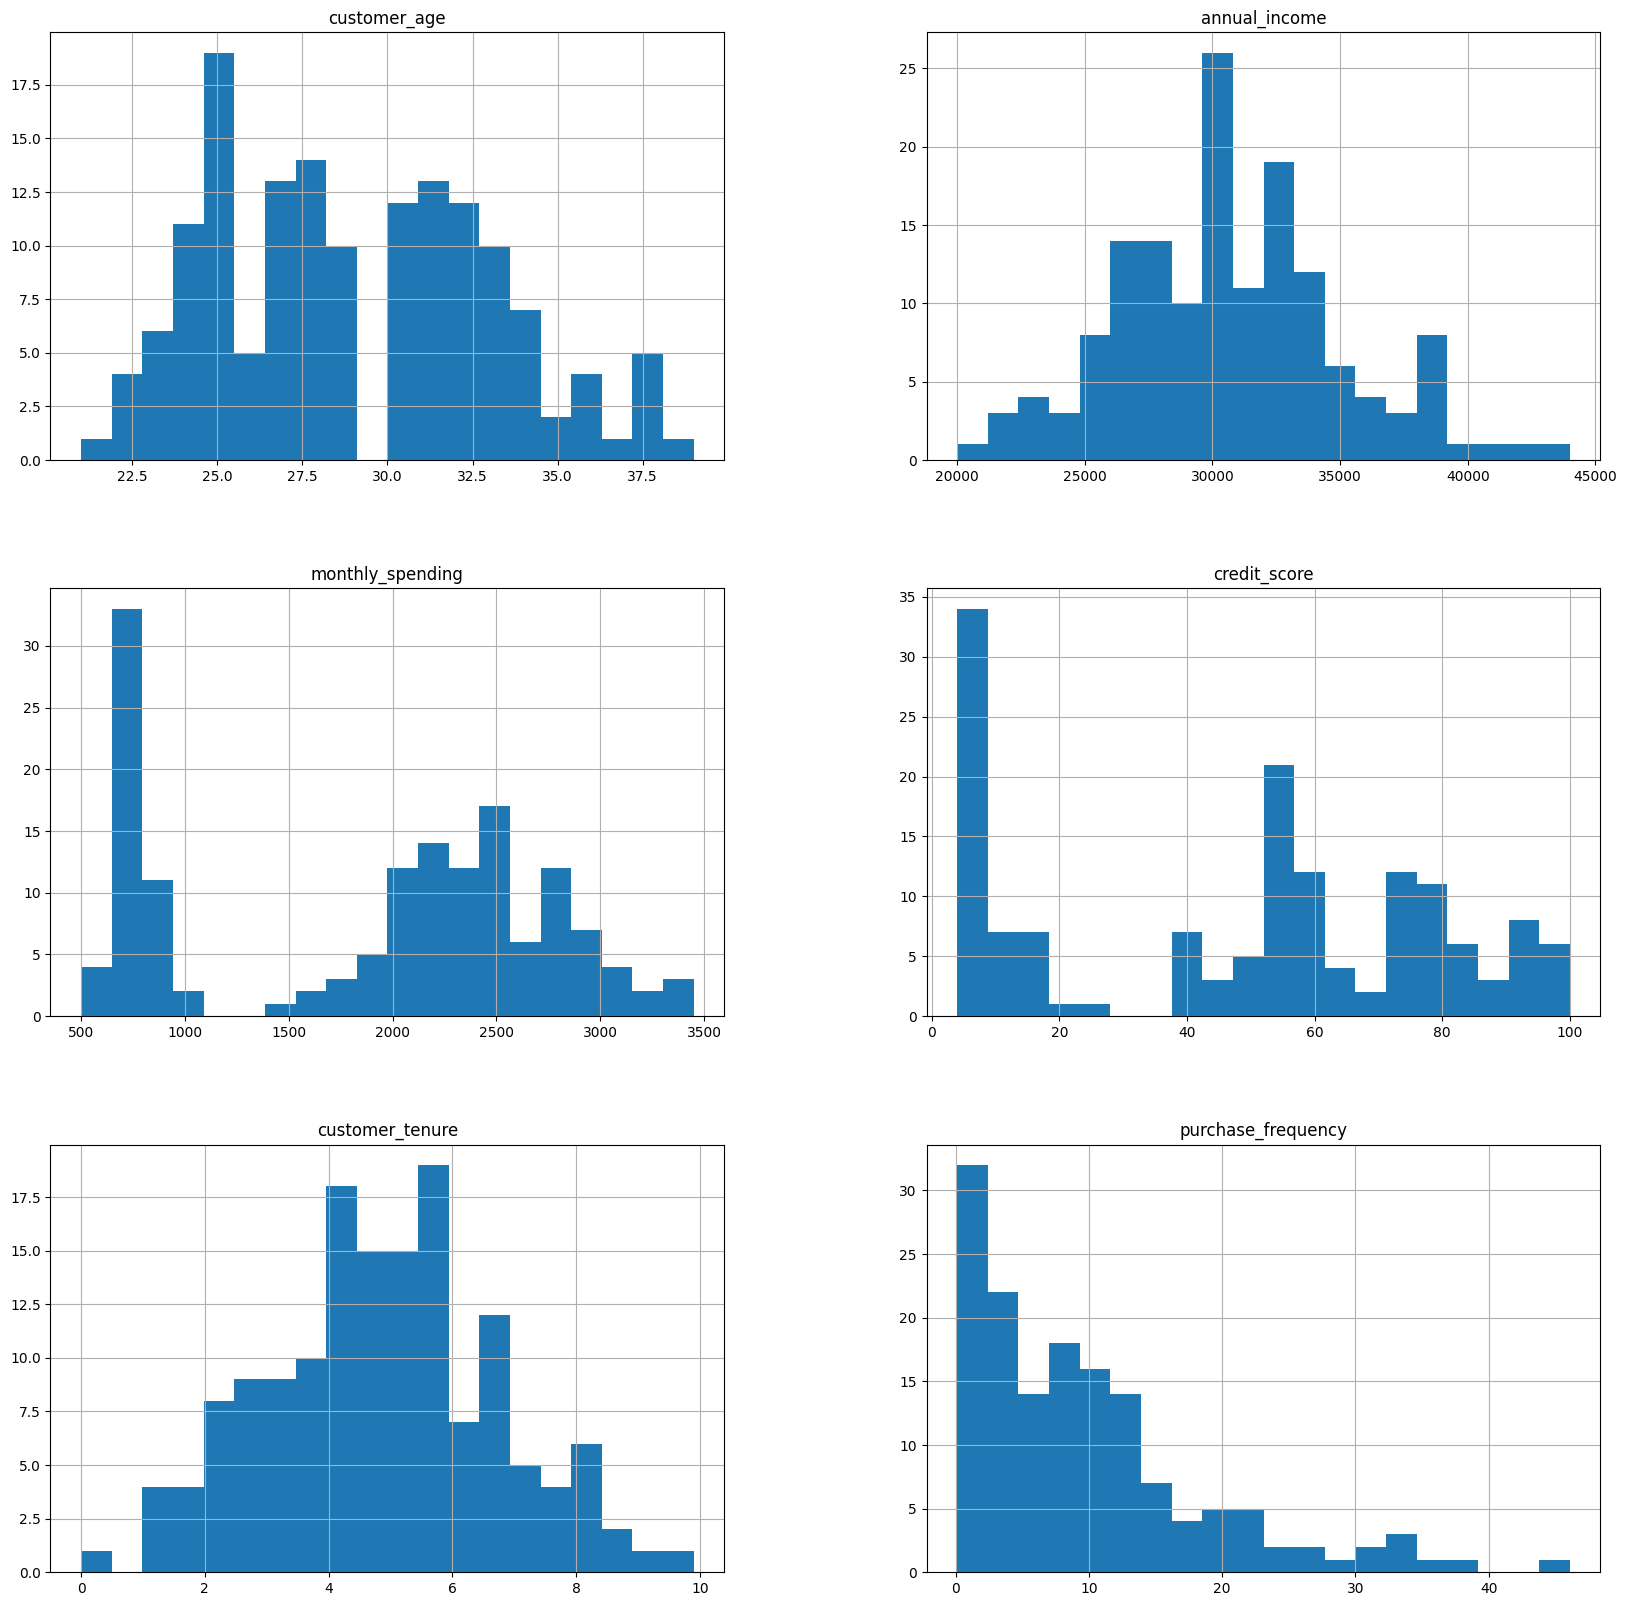

In [10]:
df_customer_abt[features].hist(bins=20, figsize=(20, 20))
plt.show()

#### Box Plots

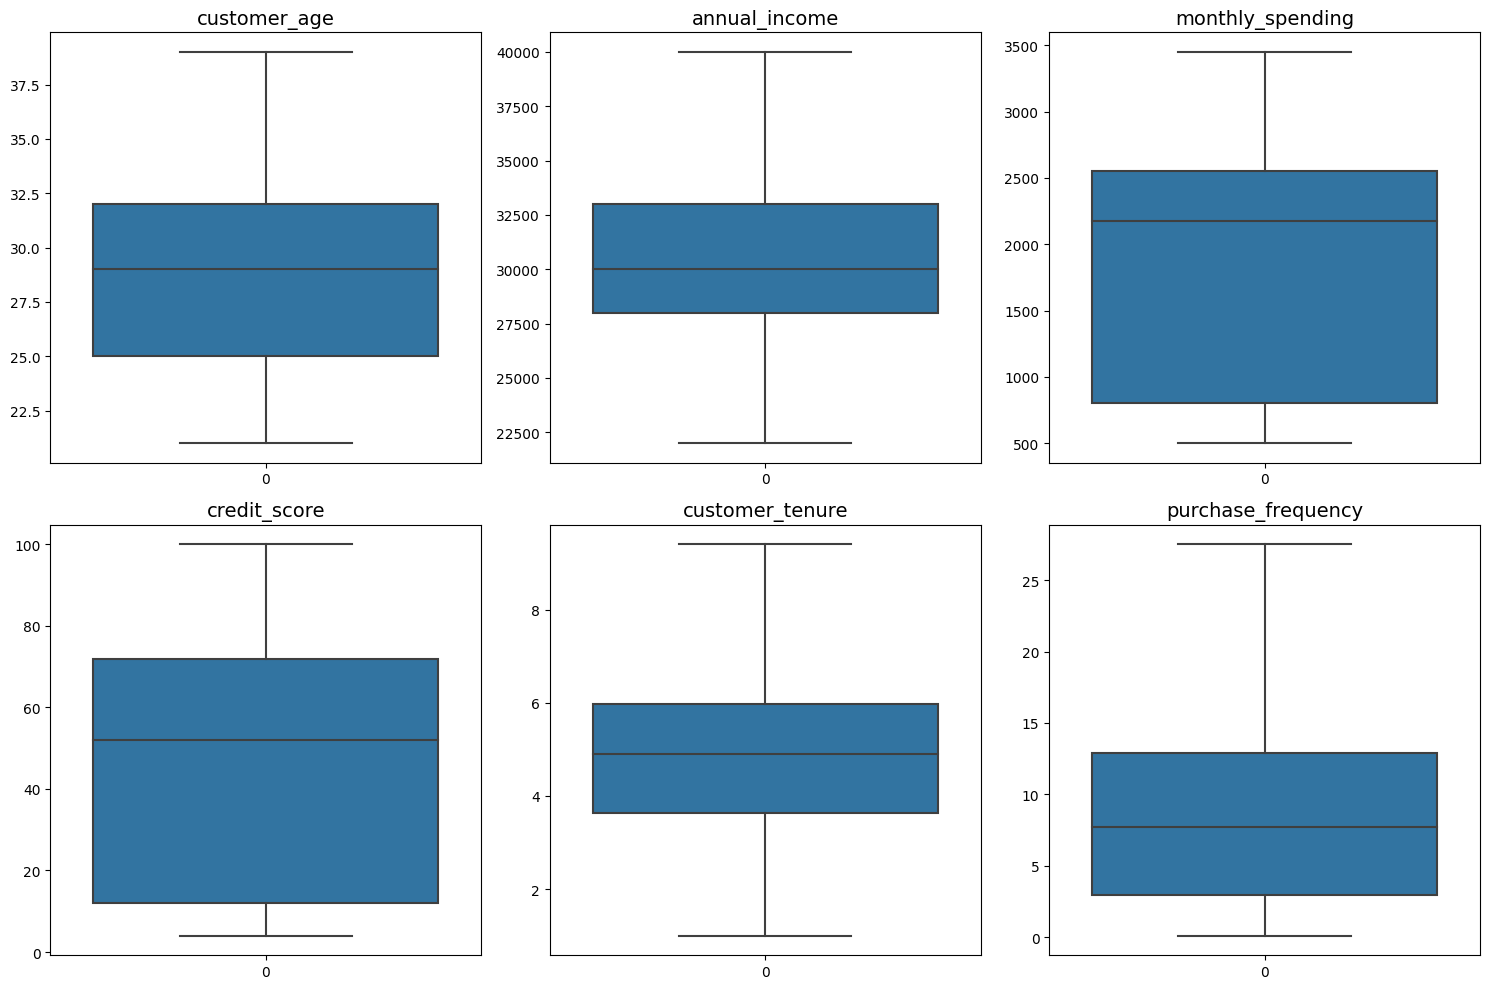

In [11]:
# Set up the plotting area for individual subplots
num_columns = 3
num_features = len(features)
num_rows = (num_features + num_columns - 1) // num_columns

plt.figure(figsize=(15, num_rows * 5))

for i, feature in enumerate(features):
    plt.subplot(num_rows, num_columns, i + 1)
    sns.boxplot(data=df_customer_abt[feature], showfliers=False, orient='v')
    plt.title(f"{feature}", fontsize=14)

plt.tight_layout()
plt.show()

#### Bar Plots

Understand the frequency distribution of categorical variables.

If certain categories have very few observations, you might decide to merge them with other categories or remove them.

C:\Users\preis\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\preis\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\preis\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) 

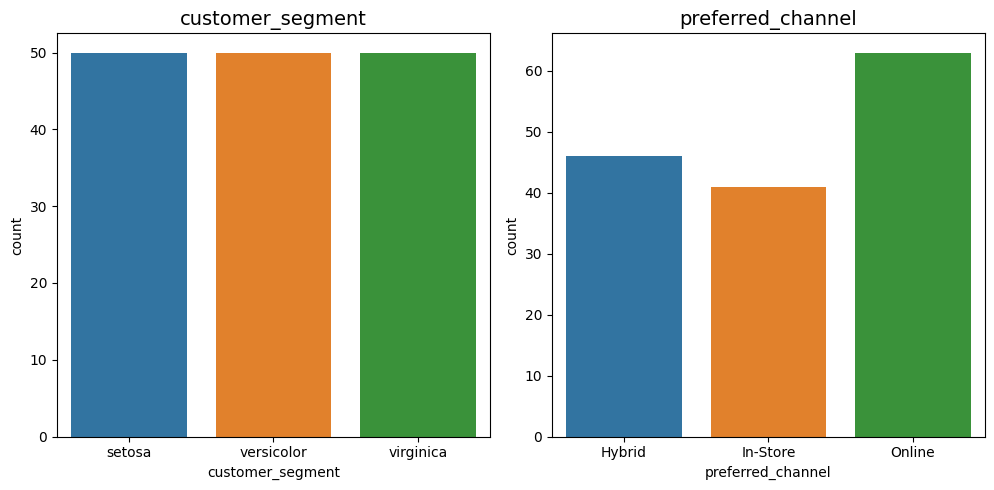

In [12]:
# Set up the plotting area for individual subplots
num_columns = 3
num_categories = len(categories)  # Use categories instead of features
num_rows = (num_categories + num_columns - 1) // num_columns

# Set the figure size
plt.figure(figsize=(15, num_rows * 5))

# Loop through each category and create a count plot
for i, category in enumerate(categories):
    if df_customer_abt[category].nunique() <= 10:
        plt.subplot(num_rows, num_columns, i + 1)
        sns.countplot(data=df_customer_abt, x=category)
        plt.title(f"{category}", fontsize=14)
    else:
        print(f"No PLot because of Unique Values for '{category}' = {df_customer_abt[category].nunique()}")
plt.tight_layout()
plt.show()

## Bivariate Analysis

Identify potential patterns, correlations, or dependencies between variables.   
Is there a natural grouping between multiple variables?

        "You are trying to see the clusters before they are formed"

        Clusters Centers: if centroids are identified K-means might be a good choice.
        Cluster Spread: evaluate spread/dispersion so that DBScan might be of use.

Each Cluster should form a distinct group with minimal overlap. Points within the same cluster should be close together.

        If clusters overlap significantly, you may need to reconsider your feature selection, normalization or clustering algorithm.


If variables show strong correlations, you might decide to remove one of them to reduce multicollinearity.


#### Scatter Plots

In [13]:
categories

Index(['customer_segment', 'preferred_channel'], dtype='object')

C:\Users\preis\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\preis\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\preis\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) 

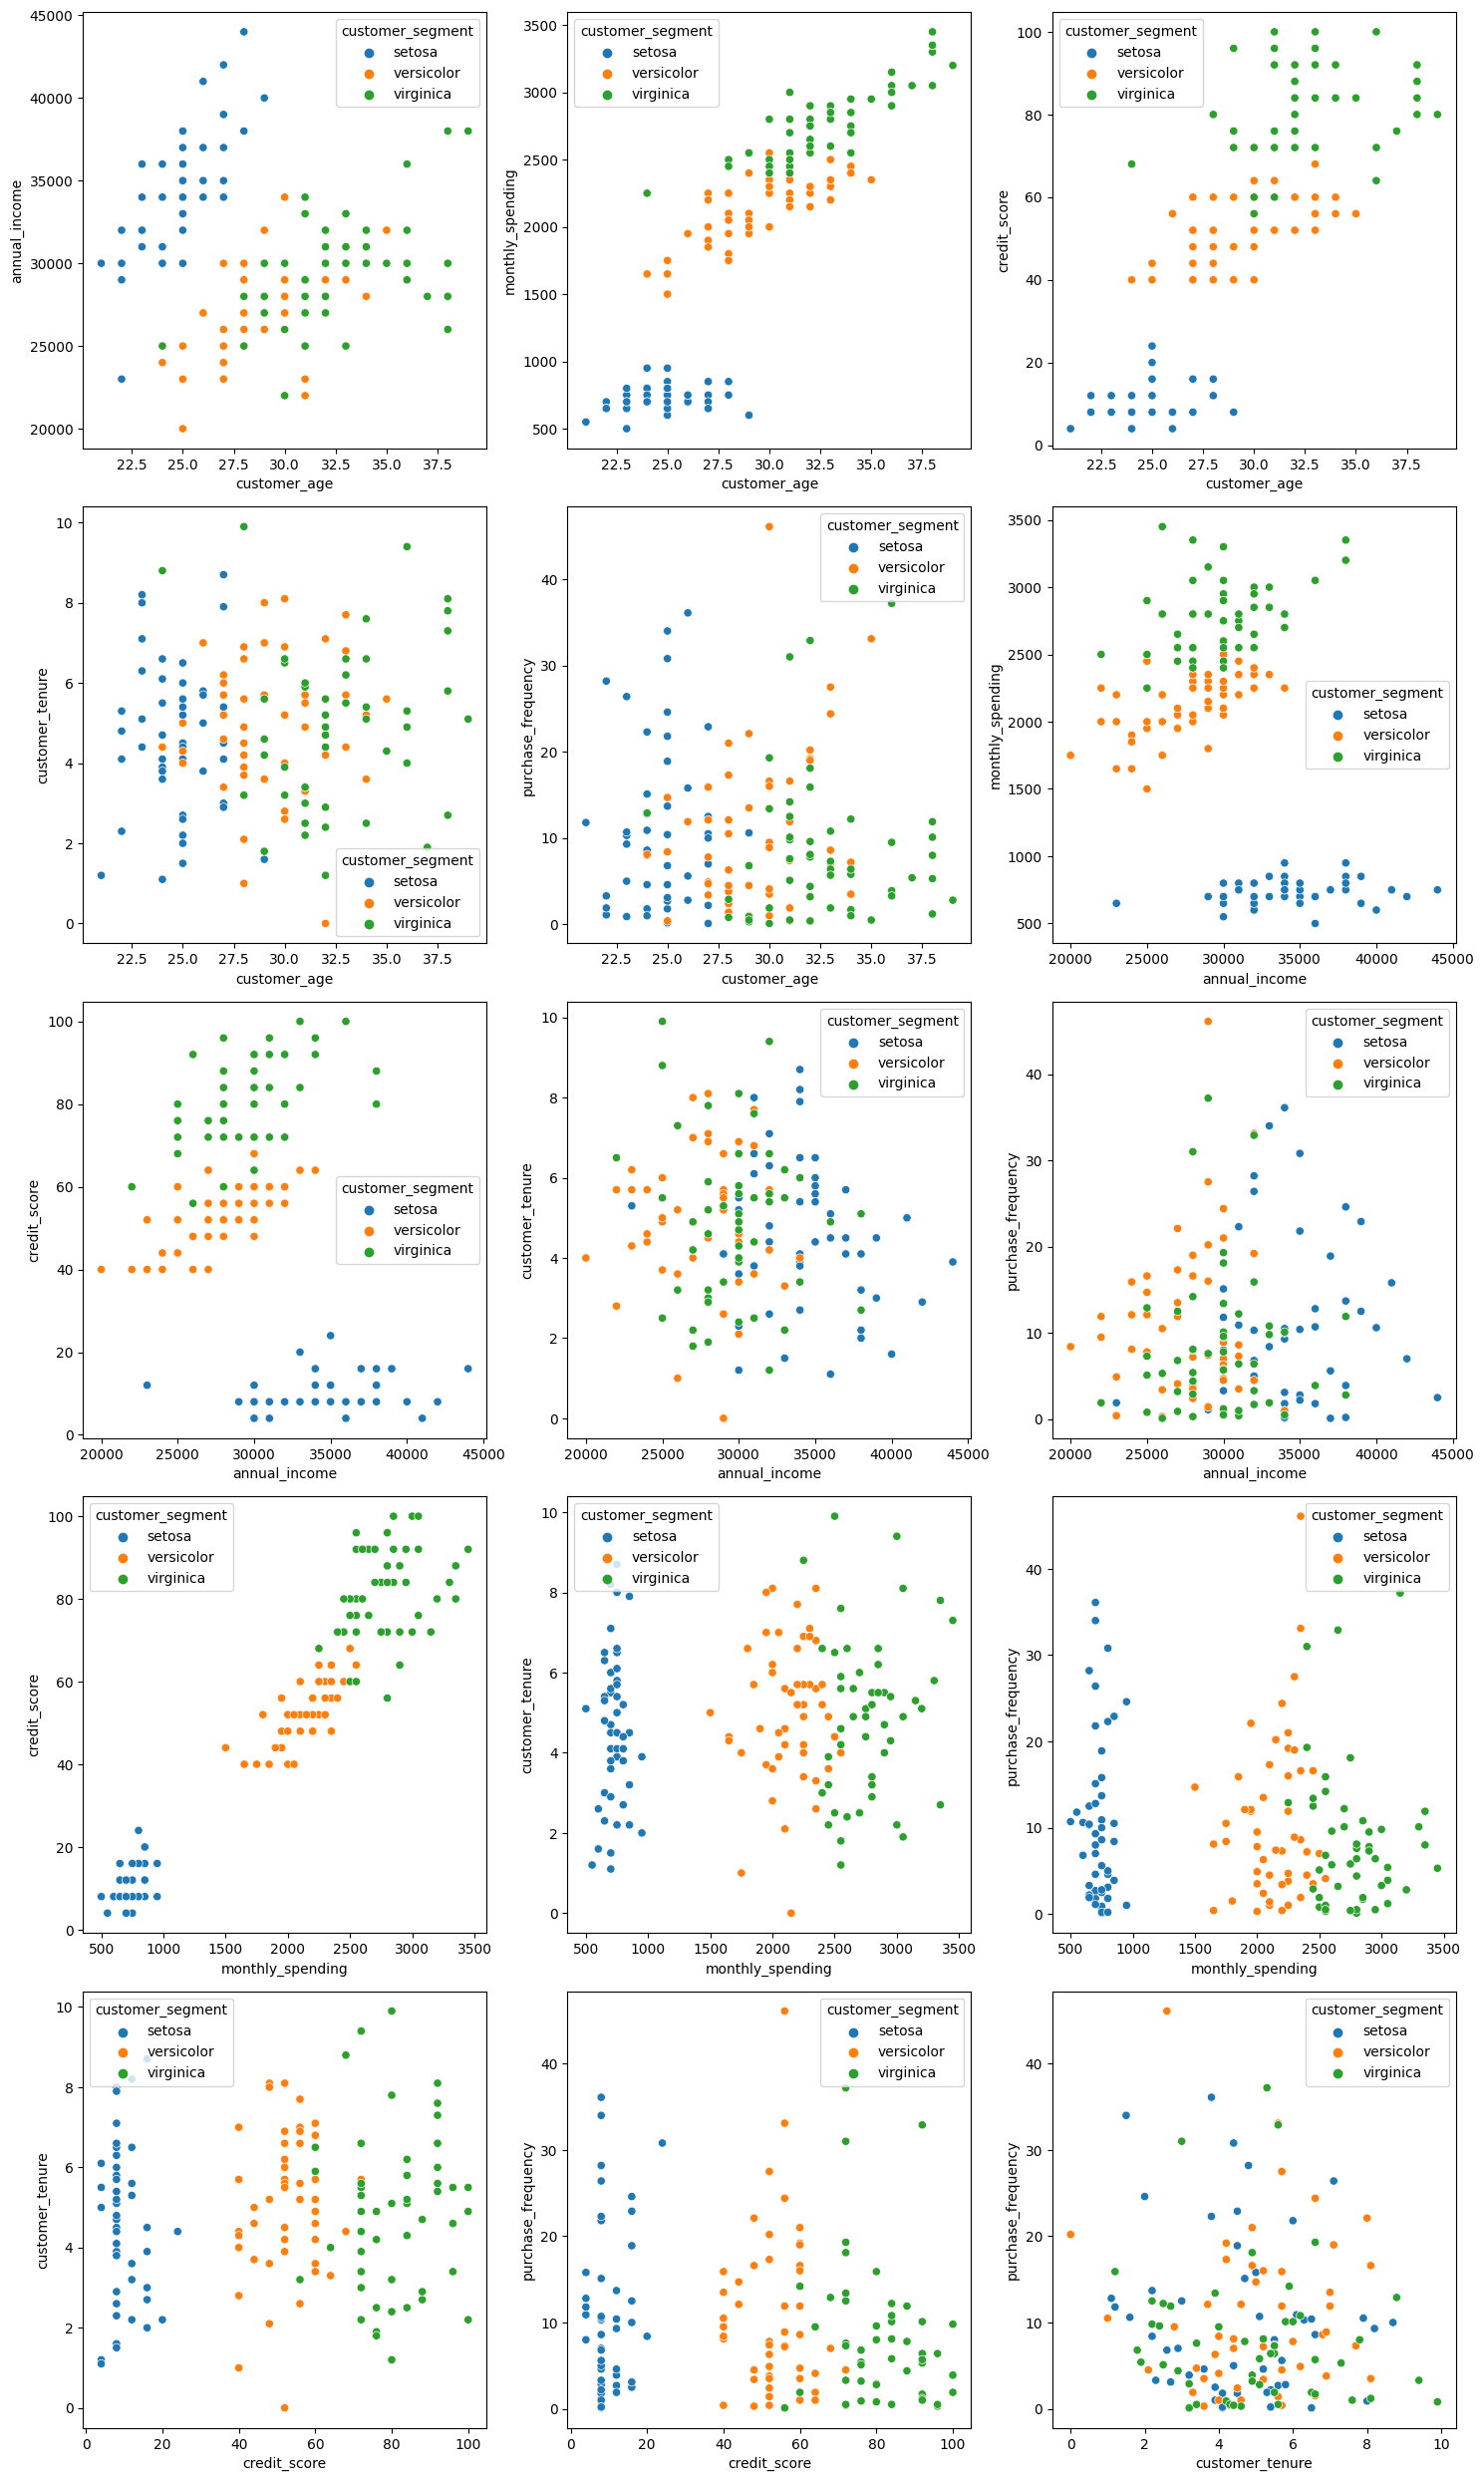

CPU times: total: 438 ms
Wall time: 1.56 s


In [14]:
%%time
category = 'customer_segment'

# Number of columns for the subplot grid
num_columns = 3
num_rows = (len(features) * (len(features) - 1) // 2 + num_columns - 1) // num_columns  # Calculate the number of rows needed

# Set up the figure size
plt.figure(figsize=(15, num_rows * 5))

# Create a scatter plot for each pair of features
plot_index = 1
for i in range(len(features)):
    for j in range(i + 1, len(features)):
        plt.subplot(num_rows, num_columns, plot_index)
        sns.scatterplot(data=df_customer_abt, x=features[i], y=features[j], hue=category)
        # plt.title(f'{features[i]} vs. {features[j]}')
        plt.xlabel(features[i])
        plt.ylabel(features[j])
        plot_index += 1

# Adjust the layout to prevent overlap
plt.tight_layout()
plt.show()

#### Pair Plots

In [15]:
"Just Like The Previous Section"
# sns.pairplot(df_customer_abt[features], diag_kind='kde', plot_kws={'alpha': 0.5})   

'Just Like The Previous Section'

#### Box Plots by Category

If significant differences are observed betwee categories, you might decide to include the category in your model.

        "You're trying to see the clusters before they are formed. Difference between the boxes"
        Significant differences can indicate that the variable is useful for distinguishing between groups.

C:\Users\preis\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\preis\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\preis\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) 

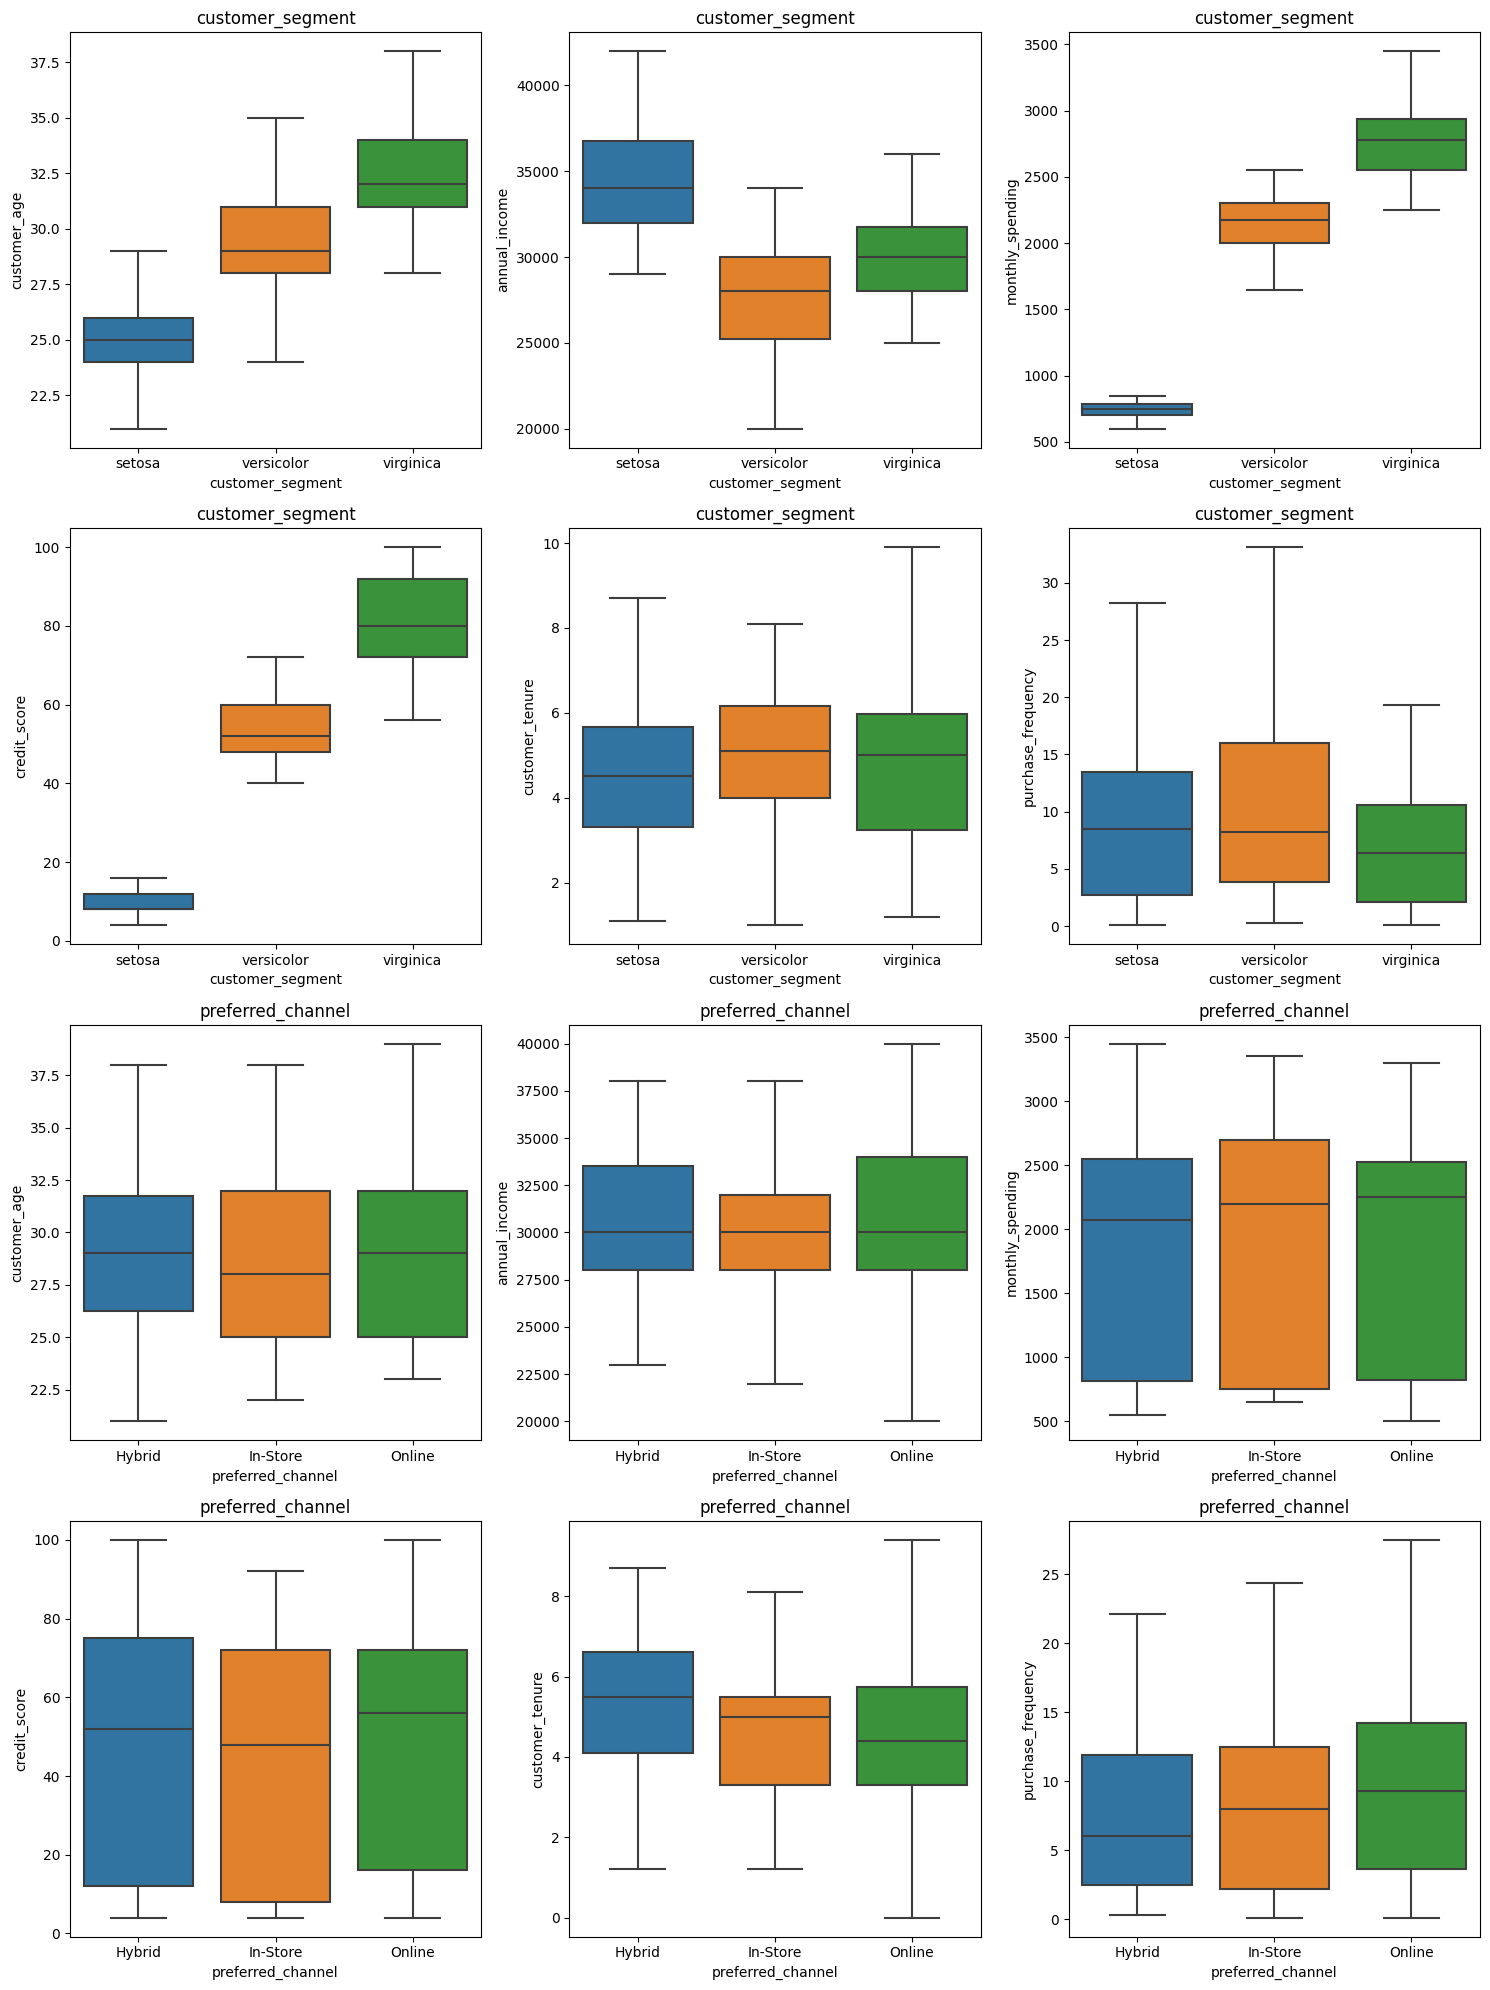

CPU times: total: 344 ms
Wall time: 802 ms


In [16]:
%%time

# Set the number of columns for the subplot grid
num_columns = 3
num_plots = len(categories) * len(features)
num_rows = (num_plots + num_columns - 1) // num_columns  # Calculate the number of rows needed

# Set up the figure size
plt.figure(figsize=(15, num_rows * 5))

# Plot index
plot_index = 1

# Create a box plot for each combination of categorical and continuous features
for category in categories:
    if df_customer_abt[category].nunique() <= 10:
        for feature in features:
            plt.subplot(num_rows, num_columns, plot_index)
            sns.boxplot(x=category, y=feature, data=df_customer_abt, showfliers=False)
            plt.title(f'{category}')
            plt.xlabel(category)
            plt.ylabel(feature)
            plot_index += 1
    else:
        print(f"No PLot because of Unique Values for '{category}' = {df_customer_abt[category].nunique()}")

# Adjust the layout to prevent overlap
plt.tight_layout()
plt.show()

### Multivariate Analysis




#### Correlation Heatmap

Visualize the correlation matrix between multiple variables to identify strong and weak relationships.

High correlations may indicate redundancy (same information in two different variables), suggesting the use of dimensionality reduction techniques like PCA before clustering.


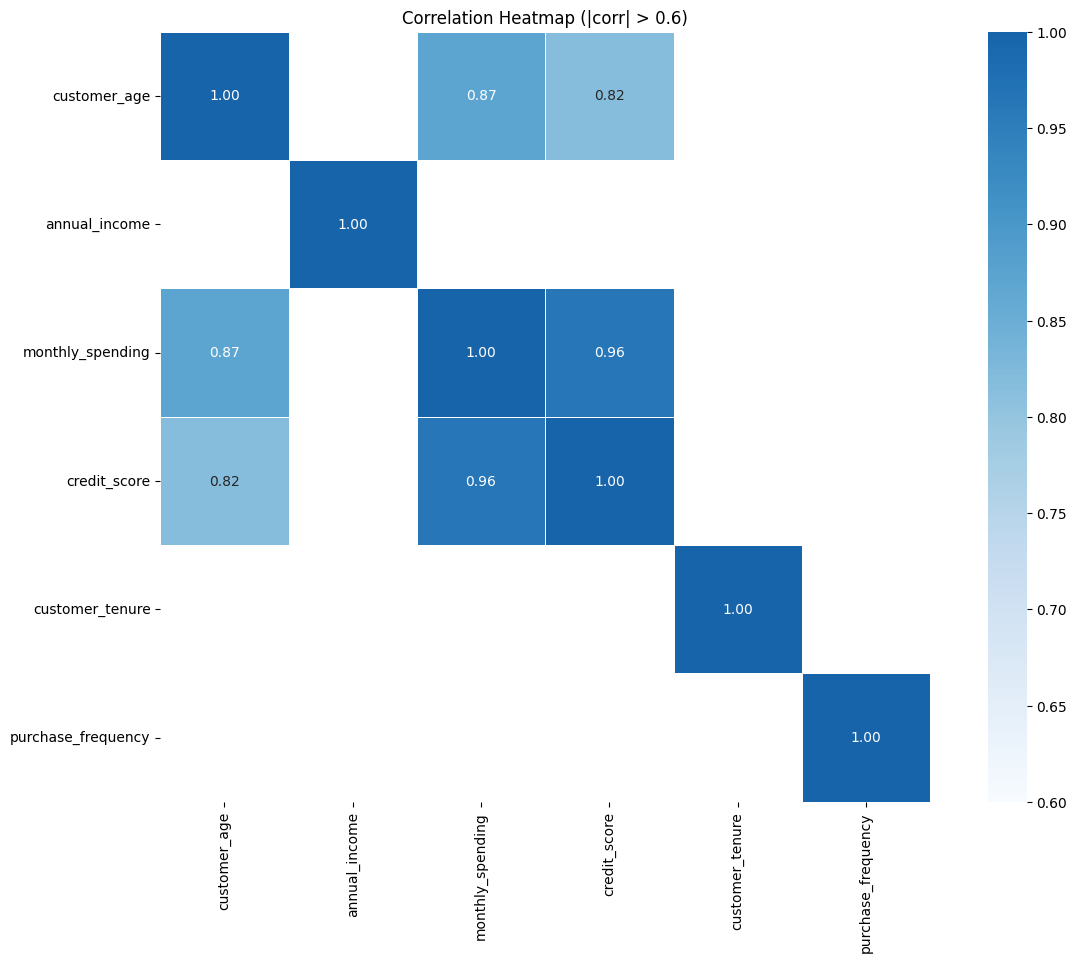

In [17]:
selected_features = features

# Calculate the correlation matrix
corr_matrix = df_customer_abt[selected_features].corr()

# Apply a mask to keep only correlations greater than...
mask = np.abs(corr_matrix) < 0.6
filtered_corr_matrix = corr_matrix.mask(mask)

# Set up the figure size
plt.figure(figsize=(15, 10))

# Create a heatmap
sns.heatmap(filtered_corr_matrix, annot=True, cmap='Blues', vmin=0.6, vmax=1, center=0.85, cbar=True, square=True, fmt='.2f', linewidths=0.5)

# Set the title
plt.title('Correlation Heatmap (|corr| > 0.6)')

# Show the plot
plt.show()

#### 3D Scatter Plot

Examine relationships between three continuous variables to identify patterns that may not be visible in 2D plots.

If clusters are observed in 3D space, multidimensional clustering algorithms like DBSCAN or GMM might be appropriate.

In [18]:
# Eh... Not Really Recommended

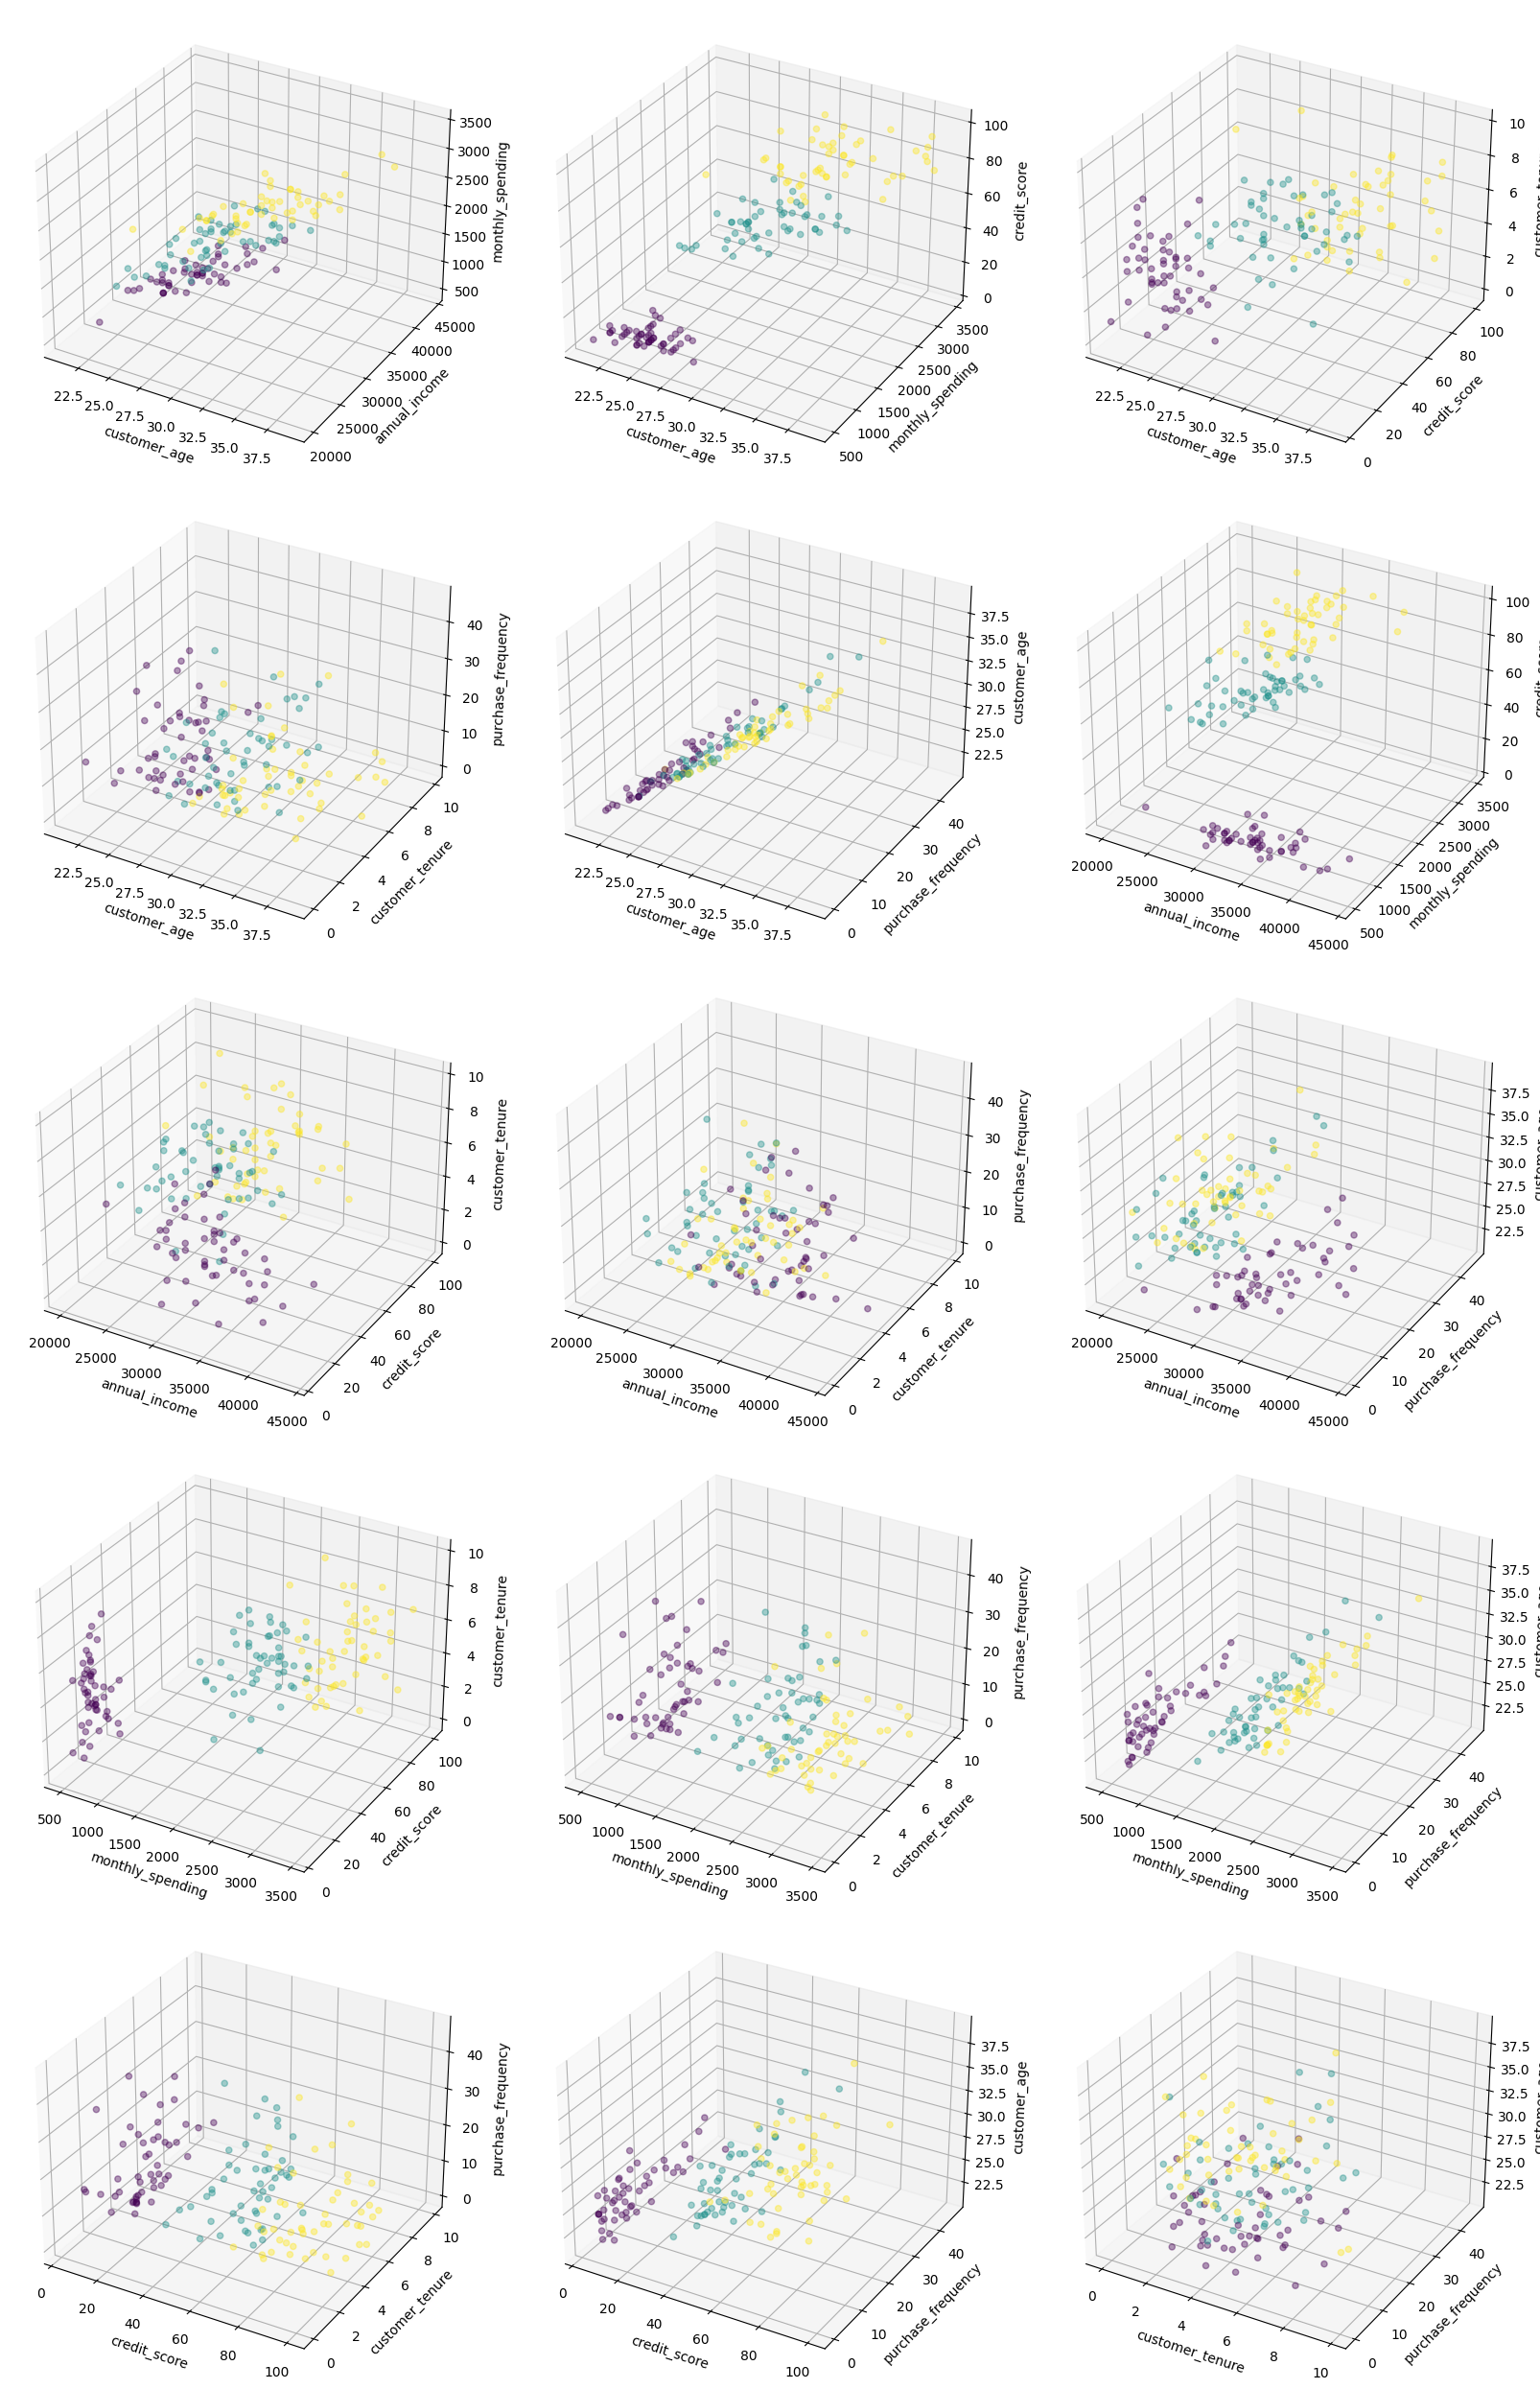

In [19]:
category = 'customer_segment'

# Number of columns for the subplot grid
num_columns = 3
num_rows = (len(features) * (len(features) - 1) // 2 + num_columns - 1) // num_columns  # Calculate the number of rows needed

# Set up the figure size
fig = plt.figure(figsize=(17, num_rows * 5))

# Create a 3D scatter plot for each pair of features
plot_index = 1
for i in range(len(features)):
    for j in range(i + 1, len(features)):
        ax = fig.add_subplot(num_rows, num_columns, plot_index, projection='3d')
        scatter = ax.scatter(
            df_customer_abt[features[i]],
            df_customer_abt[features[j]],
            df_customer_abt[features[(j + 1) % len(features)]],  # Use the next feature for z-axis
            c=df_customer_abt[category].astype('category').cat.codes,  # Convert category to numeric for coloring
            cmap='viridis',
            alpha=0.4
        )
        # ax.set_title(f'{features[i]} vs. {features[j]} vs. {features[(j + 1) % len(features)]}')
        ax.set_xlabel(features[i])
        ax.set_ylabel(features[j])
        ax.set_zlabel(features[(j + 1) % len(features)])
        plot_index += 1

# Adjust the layout
plt.tight_layout()
plt.show()


### Data Distribution and Density

#### Denity Plots (KDE)

Estimate the probability density function of continuous variables to understand their distribution and identify modes.

Multimodal distributions suggest that mixture models (e.g., Gaussian Mixture Models) could be effective.


Clusterable Features: Features with distinct peaks or modes are likely to be good candidates for clustering.

Multimodal distributions suggest natural clusters within the data.

Data Spread: Features with wide distributions might need normalization before clustering.

C:\Users\preis\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\preis\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\preis\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Categori

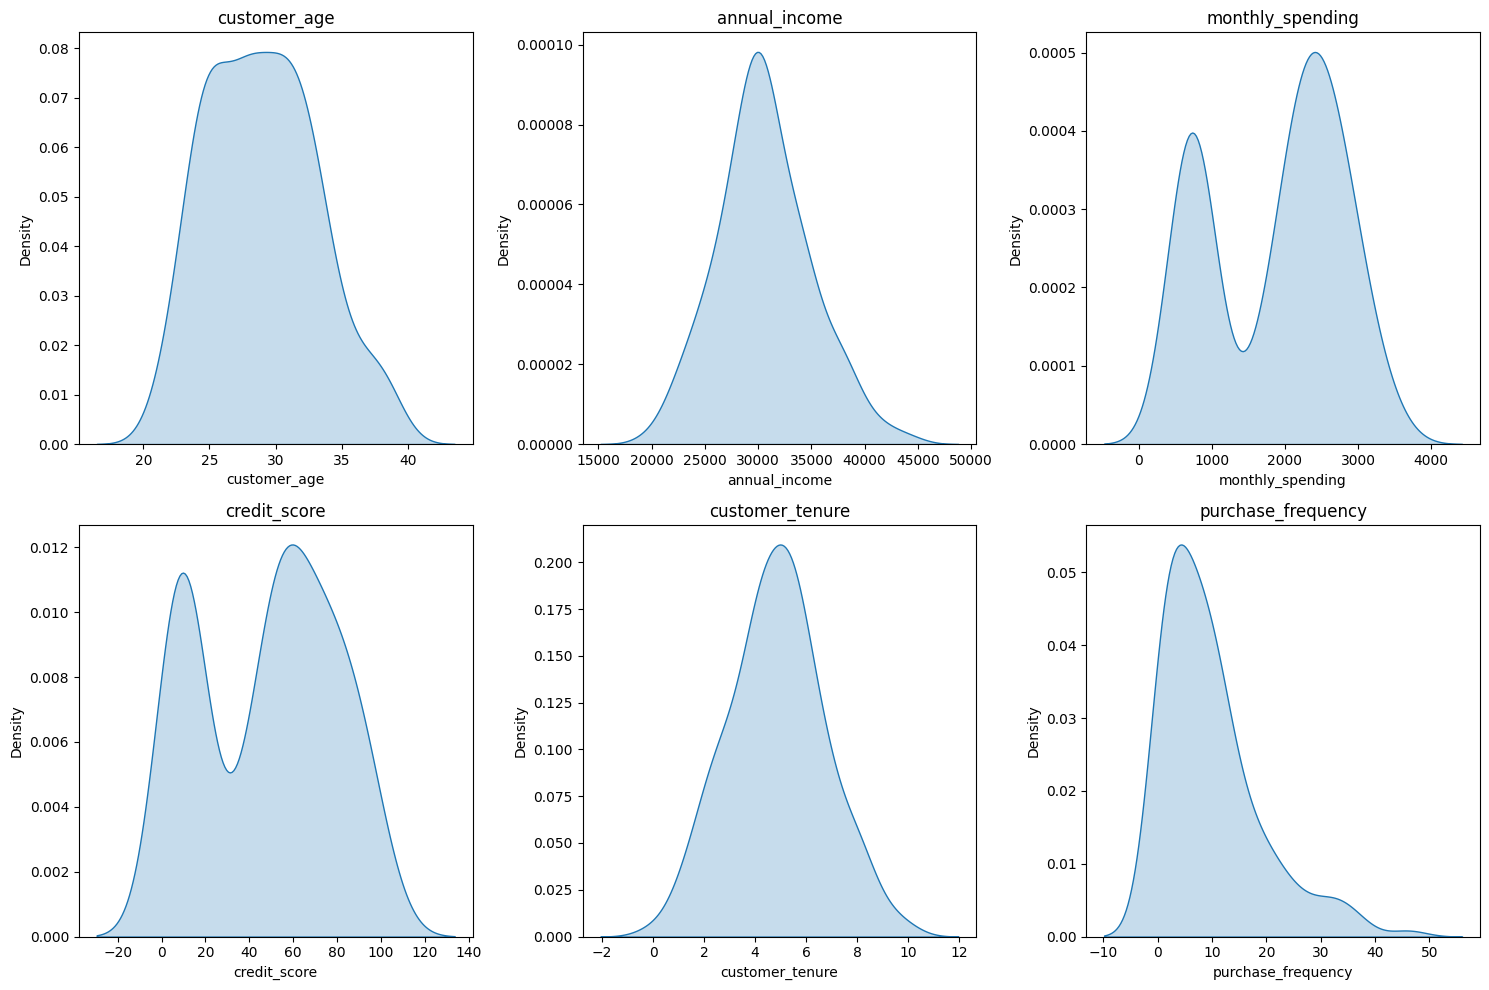

CPU times: total: 188 ms
Wall time: 585 ms


In [20]:
%%time
# Number of columns for the subplot grid
num_columns = 3
num_rows = (len(features) + num_columns - 1) // num_columns  # Calculate the number of rows needed

# Set up the figure size
plt.figure(figsize=(15, num_rows * 5))

# Create a density plot for each continuous feature
for i, feature in enumerate(features):
    plt.subplot(num_rows, num_columns, i + 1)
    sns.kdeplot(df_customer_abt[feature].dropna(), fill=True)
    plt.title(f'{feature}')
    plt.xlabel(feature)
    plt.ylabel('Density')

# Adjust the layout to prevent overlap
plt.tight_layout()
plt.show()

#### Hexbin Plots

Visualize the density of data points in 2D space, especially useful for large datasets to identify dense and sparse regions.

Regions with high density may indicate potential clusters.    
If dense regions and sparse regions are identified, you might decide to use density-based clustering methods like DBSCAN.

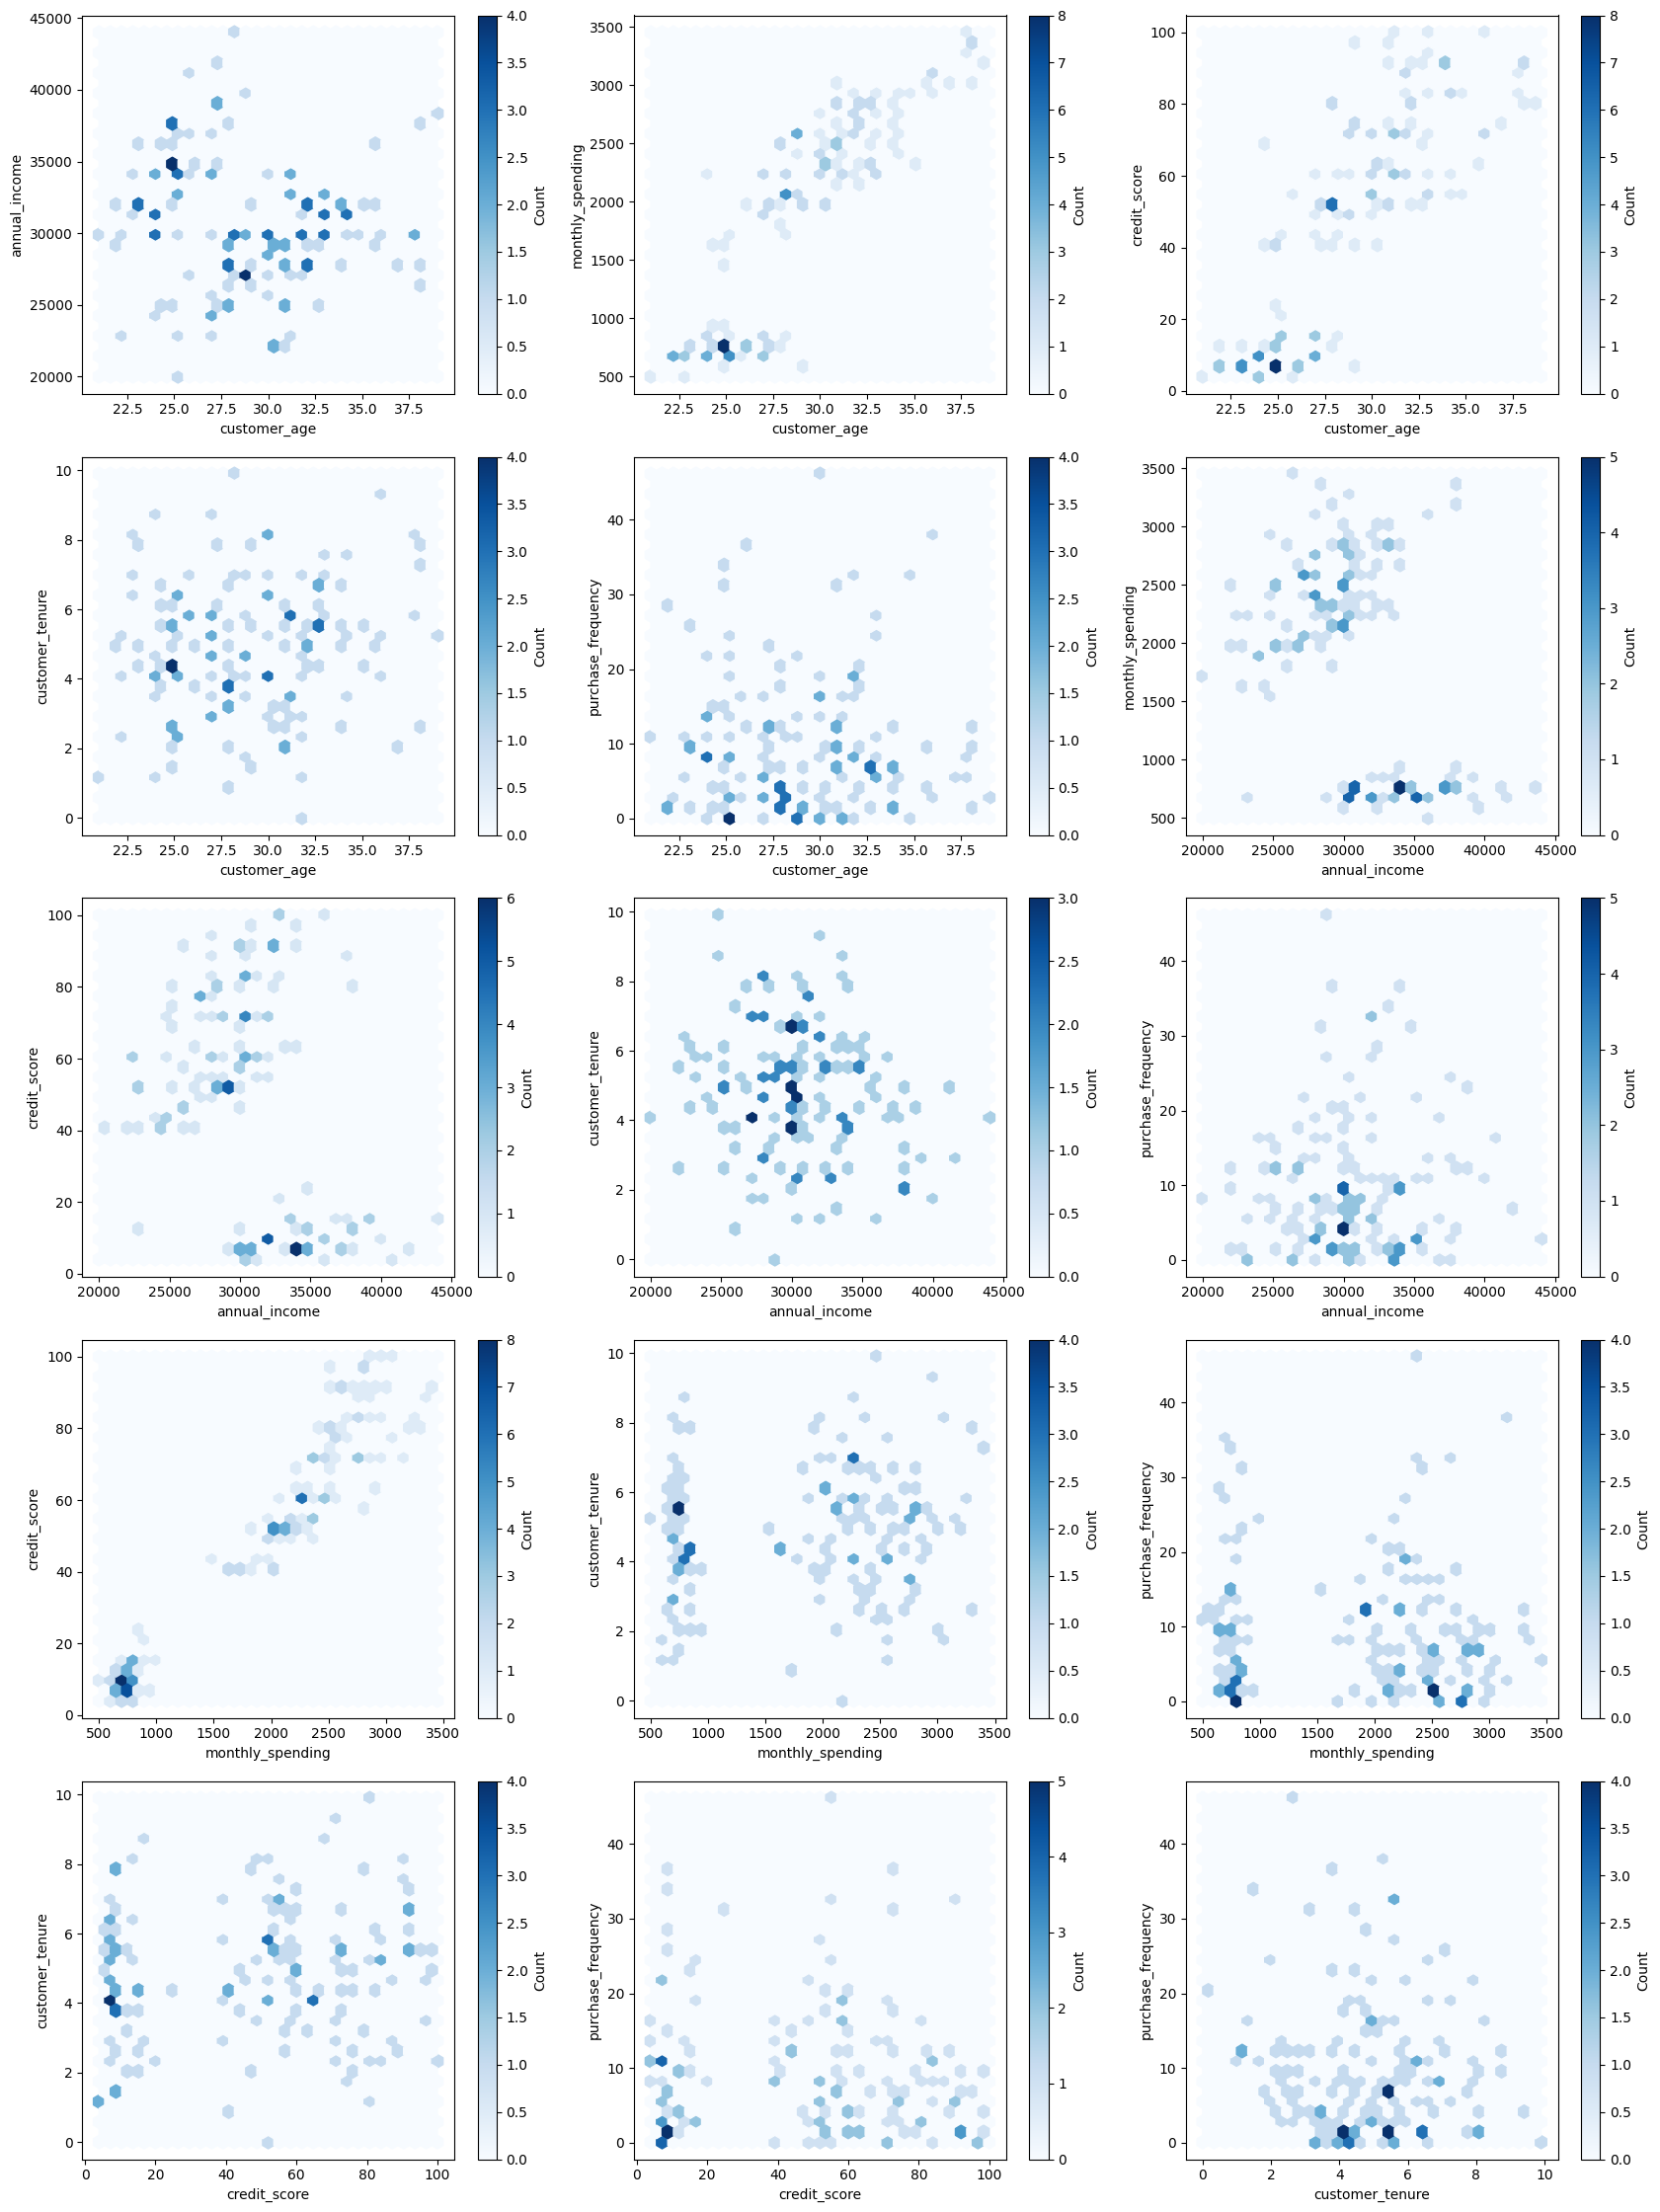

CPU times: total: 453 ms
Wall time: 1.55 s


In [21]:
%%time
# Number of columns for the subplot grid
num_columns = 3
num_rows = (len(features) * (len(features) - 1) // 2 + num_columns - 1) // num_columns  # Calculate the number of rows needed

# Set up the figure size
plt.figure(figsize=(17, num_rows * 4.5))

# Create a hexbin plot for each pair of continuous features
plot_index = 1
for i in range(len(features)):
    for j in range(i + 1, len(features)):
        plt.subplot(num_rows, num_columns, plot_index)
        plt.hexbin(df_customer_abt[features[i]], df_customer_abt[features[j]], gridsize=30, cmap='Blues')
        plt.colorbar(label='Count')
        # plt.title(f'{features[i]} vs. {features[j]}')
        plt.xlabel(features[i])
        plt.ylabel(features[j])
        plot_index += 1

# Adjust the layout to prevent overlap
plt.tight_layout()
plt.show()

### Summary and Insights

Document key insights and observations from the EDA process, including patterns, trends, and potential issues.

Summarized insights will guide the selection of the most suitable clustering algorithm based on the data's characteristics.

In [3]:
"""Charts that ilustrate the reasons for Decisions made based on the Exploratory Data Analysis"""

'Charts that ilustrate the reasons for Decisions made based on the Exploratory Data Analysis'